#                                                  SYNESTHETIZER

Paint a picture out of music

https://en.wikipedia.org/wiki/Chromesthesia

## 1. Grab the notes 

Sauce - https://github.com/ianvonseggern1/note-prediction

In [1]:
"""
Specify the audio file/path here
"""

# audio_file = "VMM Recorder Song 7 Twinkle Twinkle Little Star.mp3"
audio_file = "Kanakana Mix 1.2.mp3"

In [2]:
# """
# Setup/Imports
# """
# #!pip3 install pydub
# #!pip3 install matplotlib
# #!pip3 install python-Levenshtein
# #!pip3 install opencv-python

# import argparse

# from pydub import AudioSegment
# import pydub.scipy_effects
# import numpy as np
# import scipy
# import matplotlib.pyplot as plt

# from utils import (
#     frequency_spectrum,
#     calculate_distance,
#     classify_note_attempt_1,
#     classify_note_attempt_2,
#     classify_note_attempt_3,
# )

ModuleNotFoundError: No module named 'pydub'

In [ ]:
"""
Main function for grabbing the notes
"""

def grab(file, note_file, note_starts_file=None, plot_starts=False, plot_fft_indices=[]):
    # If a note file and/or actual start times are supplied read them in
    actual_starts = []
    if note_starts_file:
        with open(note_starts_file) as f:
            for line in f:
                actual_starts.append(float(line.strip()))

    actual_notes = []
    if note_file:
        with open(note_file) as f:
            for line in f:
                actual_notes.append(line.strip())

    song = AudioSegment.from_file(file)
    song = song.high_pass_filter(80, order=4)

    starts = predict_note_starts(song, plot_starts, actual_starts)

    predicted_notes = predict_notes(song, starts, actual_notes, plot_fft_indices)

    print("")
    if actual_notes:
        print("Actual Notes")
        print(actual_notes)
    #print("Predicted Notes")
    #print(predicted_notes)
    return predicted_notes

    if actual_notes:
        lev_distance = calculate_distance(predicted_notes, actual_notes)
        print("Levenshtein distance: {}/{}".format(lev_distance, len(actual_notes)))
 

"""
Function for grabbing the points where notes start
"""

def predict_note_starts(song, plot, actual_starts):
    # Size of segments to break song into for volume calculations
    SEGMENT_MS = 50
    # Minimum volume necessary to be considered a note
    VOLUME_THRESHOLD = -35
    # The increase from one sample to the next required to be considered a note
    EDGE_THRESHOLD = 5
    # Throw out any additional notes found in this window
    MIN_MS_BETWEEN = 100

    # Filter out lower frequencies to reduce noise
    song = song.high_pass_filter(80, order=4)
    # dBFS is decibels relative to the maximum possible loudness
    volume = [segment.dBFS for segment in song[::SEGMENT_MS]]

    predicted_starts = []
    for i in range(1, len(volume)):
        if volume[i] > VOLUME_THRESHOLD and volume[i] - volume[i - 1] > EDGE_THRESHOLD:
            ms = i * SEGMENT_MS
            # Ignore any too close together
            if len(predicted_starts) == 0 or ms - predicted_starts[-1] >= MIN_MS_BETWEEN:
                predicted_starts.append(ms)

    # If actual note start times are provided print a comparison
    if len(actual_starts) > 0:
        print("Approximate actual note start times ({})".format(len(actual_starts)))
        print(" ".join(["{:5.2f}".format(s) for s in actual_starts]))
        print("Predicted note start times ({})".format(len(predicted_starts)))
        print(" ".join(["{:5.2f}".format(ms / 1000) for ms in predicted_starts]))

    # Plot the volume over time (sec)
    if plot:
        x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
        plt.plot(x_axis, volume)

        # Add vertical lines for predicted note starts and actual note starts
        for s in actual_starts:
            plt.axvline(x=s, color="r", linewidth=0.5, linestyle="-")
        for ms in predicted_starts:
            plt.axvline(x=(ms / 1000), color="g", linewidth=0.5, linestyle=":")

        plt.show()

    return predicted_starts


"""
Function for predicting the actual notes
"""

def predict_notes(song, starts, actual_notes, plot_fft_indices):
    predicted_notes = []
    for i, start in enumerate(starts):
        sample_from = start + 50
        sample_to = start + 550
        if i < len(starts) - 1:
            sample_to = min(starts[i + 1], sample_to)
        segment = song[sample_from:sample_to]
        freqs, freq_magnitudes = frequency_spectrum(segment)

        predicted = classify_note_attempt_1(freqs, freq_magnitudes)
        predicted_notes.append(predicted or "U")

        # Print general info
        print("")
        print("Note: {}".format(i))
        if i < len(actual_notes):
            print("Predicted: {} Actual: {}".format(predicted, actual_notes[i]))
        else:
            print("Predicted: {}".format(predicted))
        print("Predicted start: {}".format(start))
        length = sample_to - sample_from
        print("Sampled from {} to {} ({} ms)".format(sample_from, sample_to, length))
        print("Frequency sample period: {}hz".format(freqs[1]))

        # Print peak info
        peak_indicies, props = scipy.signal.find_peaks(freq_magnitudes, height=0.015)
        print("Peaks of more than 1.5 percent of total frequency contribution:")
        for j, peak in enumerate(peak_indicies):
            freq = freqs[peak]
            magnitude = props["peak_heights"][j]
            print("{:.1f}hz with magnitude {:.3f}".format(freq, magnitude))

        if i in plot_fft_indices:
            plt.plot(freqs, freq_magnitudes, "b")
            plt.xlabel("Freq (Hz)")
            plt.ylabel("|X(freq)|")
            plt.show()
    return predicted_notes

#### Time to get note-y

Now that our functions are defined, time to actually grab those notes and slap them onto a list

In [3]:
notes = grab(audio_file, note_file="output.txt")

"""The writing into the note_file part doesn't work. Bleh"""

NameError: name 'grab' is not defined

In [ ]:
"""
Unidentified notes will be identified as 'U'. These notes are removed from the notes list
"""

notes = [i for i in notes if i != 'U'] 
#notes

# START HERE -  Import the notes from a file

In [28]:
import matplotlib.pyplot as plt
!pip install opencv-contrib-python

     |████████████████████████████████| 66.7 MB 10.2 MB/s eta 0:00:01


In [10]:
my_file = open("notes.txt", "r")
content_list = my_file.readlines()
notes = []
for note in content_list:
    if note[0]!='\n':
        notes.append(note[0])
    
print(notes)

['C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'E', 'F']


## 2. Clean up the notes 

Remove any erroneous notes

In [11]:
"""
Define Percentage Threshold for errors - If the frequency of occurence of any notes are less than <percentThresh>% 
of the total number of ntoes identified, they will be removed. 

Higher values means a 'looser' accuracy
"""

percentThresh = 10

In [12]:
"""
Function to count the frequency of notes
"""

def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    return freq

In [13]:
freqDict = CountFrequency(notes)
freqDict

{'C': 10, 'D': 10, 'E': 10, 'F': 10}

In [14]:
"""Calculate actual threshold based on percentThresh specified earlier"""

threshold = sum(freqDict.values())/percentThresh
threshold

4.0

In [15]:
"""Find the notes which have a lesser frequency of occurence as compared to the threshold calculated """

removeList = []
for key,value in freqDict.items():
    if value < threshold:
        removeList.append(key)
        
removeList

[]

In [16]:
"""Remove these notes from the notes list"""

cleanNotes = [i for i in notes if i not in removeList]
#cleanNotes

## 3. Generating a Painting

Oh boy it's the big 'un

Possible Approaches: 

1. Easy - Generate color grid, create painting out of the grid - Currently following this
2. Hard - Grab the color palette, create painting out of the color palette using a model trained on abstract paintings

In [35]:
"""Setup/Imports"""
!pip install opencv-python
!pip uninstall -y opencv-python
import cv2

  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64


In [19]:
"""
Define a dictionary showing the mapping between the note and a color

One possible mapping is the Scriabin keys - https://en.wikipedia.org/wiki/Clavier_%C3%A0_lumi%C3%A8res

TODO - Implement more mappings. Circle of 5ths?
"""

scriabinDict = {"C":"#ff0000", "C#": "#cf9bff", "D": "#ffff00", "D#":"#65659a", "E": "#e4fbff", "F": "#ae1600", "F#": "#00cdff", "G": "#ff6500", "G#": "#ff00ff", "A": "#30cd30", "A#": "#8d8b8d", "B": "#0000fe"}
#scriabinDict

In [20]:
"""
Convert the list of notes into a list of corresponding hex values
"""

hexList = []

for note in cleanNotes:
    for notekey, notehex in scriabinDict.items():
        if note == notekey:
            hexList.append(notehex)
            
#hexList

In [21]:
"""
Function to find the 'best' factor pair

The aim is to create a rectangular grid, each cell containing colors from the list. 

The rectangle closest to looking like an image is one that is neither too tall or too wide. This means a length and
breadth that are closest to each other. 

This function calculates all the possible pairs of factors for the length of the list and picks the pair that has 
the least difference between the numbers of the pair
"""

def findBestFactorPair(n): 
    newdiff = 10000
    for i in range(1, int(pow(n, 1 / 2))+1): 
        if n % i == 0: 
            if ((n/i)-i)<newdiff:
                xfact = i
                yfact = n/i
    return xfact,int(yfact)

In [22]:
"""
Call the function to find the length and breadth of the rectangular grid we are going to create

But before we do that, in order to avoid prime number lengths, the list popped is once if the length of the list is
an odd number. 

This might sound wonky but it feels much faster compared to actually checking for a prime number and handling that
case, especially when we are obfuscating the image a bunch. Therefore the length of the list will always be even.

TODO - In case the implementation of the note-grabbing gets really accurate we might need to change this to reflect
a similar level of accuracy.
"""

if len(hexList)%2 != 0:
    hexList.pop()

xfact,yfact = findBestFactorPair(len(hexList))

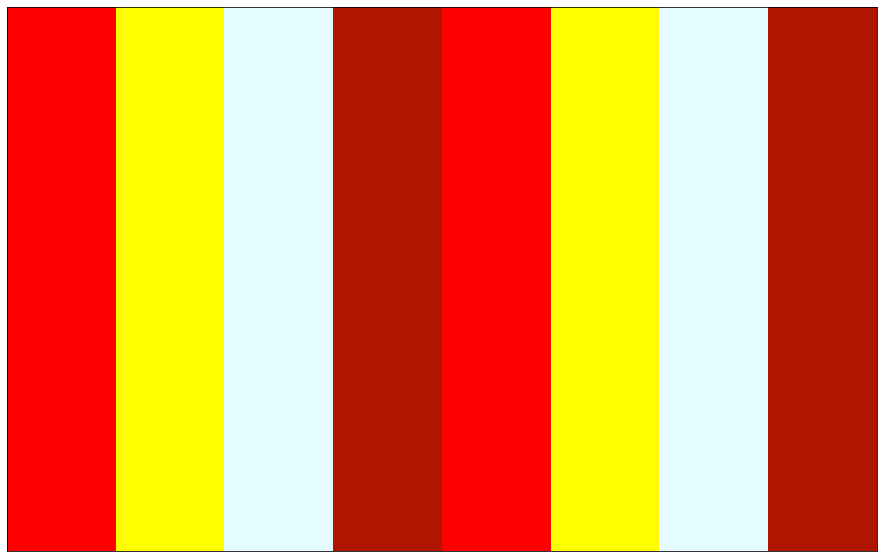

In [25]:
"""
Time to get the grid up!

Doing a bunch of stuff with matplotlib so that it ends up with a big image that doesn't have those pesky ticks and
labels

The final image is written onto a file called "Grid.png" at the same level as this notebook
"""

from matplotlib.colors import to_rgba_array

plt.figure(figsize=(20, 10))

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

plt.imshow(to_rgba_array(hexList).reshape(xfact,yfact,4))

plt.savefig('Grid.png', bbox_inches='tight')

#### Now give it life! 

Turn this grid into something far greater than it could've dreamt of being.

In [36]:
img = cv2.imread('Grid.png')

In [37]:
"""
Here's the wobbly bit. We're doing a bunch of fuckery with this grid. 

The #Intial Pass is meant to get as close to the targeted aesthetic as possible
The #Smoothening Pass is meant to give it a more blurred, muted look

Both of these passes involve the oilPainting, stylization(for watercolor) and a Gaussian blur

TODO - Stop winging this
"""

res = img

#Initial Pass
for i in range(5):
    res = cv2.xphoto.oilPainting(res, 7, 1)
    res = cv2.stylization(res, sigma_s=60, sigma_r=0.6)
    res = cv2.xphoto.oilPainting(res, 7, 1)
    res = cv2.blur(res,(5,5))
  
#Smoothening Pass
for i in range(20):
    res = cv2.xphoto.oilPainting(res, 7, 1)
    res = cv2.blur(res,(5,5))
        
#plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

AttributeError: module 'cv2' has no attribute 'xphoto'

In [ ]:
"""
Write the resulting image 'res' into a file called outimg.png stored at the same level as the notebook
"""

cv2.imwrite("outimg.png", res)